In [1]:
# Load parameters. The structs generated by set_parameters_book.m are
# loades as Dictionaries
import scipy.io as sio
import numpy as np
import robustsp as rsp
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *

#from robustsp.RobustFiltering.examples.Auxiliary.show_results_book import show_results_book

ekf_th = [] # will be filled with 2d npArrays
ekf_Hc = []

for ii in range(parameter['mc']):
    # parameter['mc'] == 1
    parameter['numbermc'] = ii
    
    # generate measurements
    parameter = create_environment_book(parameter,parameter['start'],parameter['sigma_v'])
    
    # generate random starting point
    randnvector = parameter['initial_sigma']*np.random.randn(4)
    theta_init  = parameter['start']+ randnvector
    
    # estimate positions using (robust) extended Kalman filter
    ekf_th.append(rsp.ekf_toa(parameter['MeasuredDistances'],theta_init,parameter['BS'],ekf)[0]) 
    ekf_Hc.append(rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0])
    
# rsp.show_results_book

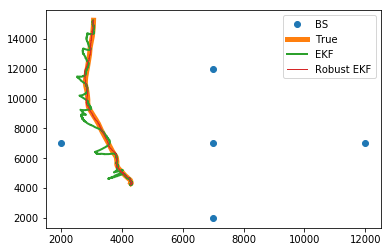

In [2]:
# show_results_book

import matplotlib.pyplot as plt

ekf_th_x = np.zeros(parameter['N'])
ekf_th_y = np.zeros(parameter['N'])
ekf_Hc_x = np.zeros(parameter['N'])
ekf_Hc_y = np.zeros(parameter['N'])
for ii in range(parameter['N']):
    # Least-squares estimation
    ekf_th_x[ii] = ekf_th[0][0][ii]
    ekf_th_y[ii] = ekf_th[0][1][ii]
    # Robust M-estimation
    ekf_Hc_x[ii] = ekf_Hc[0][0][ii]
    ekf_Hc_y[ii] = ekf_Hc[0][1][ii]  
    
# parameter

fig1 = plt.figure(0)
plt.plot(parameter['BS'][:,0], parameter['BS'][:,1], 'o', linewidth=2, label='BS')
plt.plot(parameter['thx'],parameter['thy'], linewidth=5,label='True')
plt.plot(ekf_th_x, ekf_th_y, linewidth=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, linewidth=1, label='Robust EKF')
plt.legend() 


[34.74721905 78.04908229 83.32355688 ... 27.66235869 27.80047898
 24.72875882]


<Figure size 432x288 with 0 Axes>

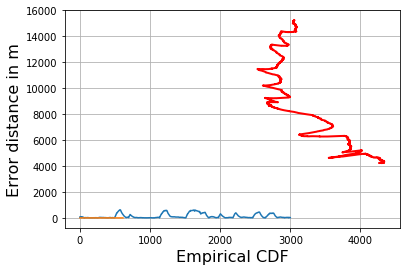

ValueError: too many values to unpack (expected 2)

In [3]:
# Evaluation of MSE
fig2 = plt.figure(1)
fig3 = plt.figure(2)
indices = np.sum(parameter['NoiseIndices'],axis=1)

eval_ekf, _ = rsp.eval_track(ekf_th, parameter, 'r', fig1, fig2, fig3)
eval_ekf_Hc, _ = rsp.eval_track(ekf_Hc, parameter, [.2, .1, .5], fig1, fig2, fig3)



In [1]:
loadmat = lambda x: sio.loadmat(x)[x]

def matStruct2Dict(x):
    struct  = loadmat(x)
    dic     = {}
    for i in struct.dtype.names:
        dic[i] = struct[i][0][0]
    return dic

ekf = matStruct2Dict('ekf')
ekf_Hc = loadmat('ekf_Hc')
ekf_th = loadmat('ekf_th')
ii = loadmat('ii')
parameter = matStruct2Dict('parameter')
rekf = matStruct2Dict('rekf')
x1 = loadmat('x1')

In [4]:
parameter.keys()

dict_keys(['N', 'BS', 'M', 'start', 'pnlos', 'initial_sigma', 'mc', 'discardN', 'grid', 'Ts', 'A', 'G', 'dim', 'numberBs', 'noisemodel', 'motionmodel', 'noiseStructure', 'figure', 'plot', 'MarkovChain', 'sigma_nlos', 'mu_nlos', 'sigma_v', 'sigma_los', 'numbermc', 'TrueTrajectory', 'TrueDistances', 'NoiseIndices', 'MeasuredDistances', 'thx', 'thy', 'thvx', 'thvy'])

In [4]:
a=np.zeros((1,5))
a[0,3]

0.0

In [9]:
len(ekf_th) #1
ekf_th[0].shape

(4, 3000)

In [10]:
parameter['N']

3000

In [5]:
np.sqrt(np.ones((5,1)))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])